In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
def train_model(model, epochs, batch_size):
    model.fit(test_images, test_labels, epochs=epochs, batch_size=batch_size)

In [6]:
epochs_list = [5, 10, 15]
batch_list = [32, 64, 128]

In [7]:
for epochs in epochs_list:
    for batch_size in batch_list:
        model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28, 28)),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.Dense(10, activation='softmax')
        ])
        
        model.compile(optimizer = 'adam',
                      loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics = ['accuracy'])
        
        train_model(model, epochs, batch_size)
        print('*' * 100)
        model.evaluate(test_images, test_labels)
        print('*' * 100)

Epoch 1/5
313/313 [==============================] - 1s 1ms/step - loss: 0.7470 - accuracy: 0.7380
Epoch 2/5
313/313 [==============================] - 0s 1ms/step - loss: 0.5267 - accuracy: 0.8172
Epoch 3/5
313/313 [==============================] - 0s 942us/step - loss: 0.4645 - accuracy: 0.8326
Epoch 4/5
313/313 [==============================] - 0s 958us/step - loss: 0.4421 - accuracy: 0.8426
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.4120 - accuracy: 0.8505
****************************************************************************************************
313/313 [==============================] - 0s 750us/step - loss: 0.3683 - accuracy: 0.8687
****************************************************************************************************
Epoch 1/5
157/157 [==============================] - 0s 1ms/step - loss: 0.7767 - accuracy: 0.7291
Epoch 2/5
157/157 [==============================] - 0s 1ms/step - loss: 0.5377 - accuracy: 0.8115
Epoch 3/5


#### Dropout

In [8]:
for epochs in epochs_list:
    for batch_size in batch_list:
        model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28, 28)),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.Dense(56, activation='elu'),
            keras.layers.Dense(108, activation='relu'),
            keras.layers.Dropout(0.15),
            keras.layers.Dense(10, activation='softmax')
        ])
        
        model.compile(optimizer = 'adam',
                      loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics = ['accuracy'])
        
        train_model(model, epochs, batch_size)
        print('*' * 100)
        model.evaluate(test_images, test_labels)
        print('*' * 100)

Epoch 1/5
313/313 [==============================] - 1s 1ms/step - loss: 0.7798 - accuracy: 0.7185
Epoch 2/5
313/313 [==============================] - 0s 1ms/step - loss: 0.5306 - accuracy: 0.8081
Epoch 3/5
313/313 [==============================] - 0s 1ms/step - loss: 0.4602 - accuracy: 0.8320
Epoch 4/5
313/313 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.8436
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.4006 - accuracy: 0.8520
****************************************************************************************************
313/313 [==============================] - 0s 997us/step - loss: 0.3403 - accuracy: 0.8766
****************************************************************************************************
Epoch 1/5
157/157 [==============================] - 1s 2ms/step - loss: 0.8530 - accuracy: 0.6933
Epoch 2/5
157/157 [==============================] - 0s 2ms/step - loss: 0.5540 - accuracy: 0.7973
Epoch 3/5
157/

#### BatchNormalization

In [9]:
for epochs in epochs_list:
    for batch_size in batch_list:
        model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28, 28)),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.Dense(56, activation='elu'),
            keras.layers.Dense(108, activation='relu'),
            keras.layers.Dense(10, activation='softmax')
        ])
        
        model.compile(optimizer = 'adam',
                      loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics = ['accuracy'])
        
        train_model(model, epochs, batch_size)
        print('*' * 100)
        model.evaluate(test_images, test_labels)
        print('*' * 100)

Epoch 1/5
313/313 [==============================] - 1s 1ms/step - loss: 0.6535 - accuracy: 0.7670
Epoch 2/5
313/313 [==============================] - 0s 1ms/step - loss: 0.4811 - accuracy: 0.8253
Epoch 3/5
313/313 [==============================] - 0s 1ms/step - loss: 0.4484 - accuracy: 0.8365
Epoch 4/5
313/313 [==============================] - 0s 1ms/step - loss: 0.4208 - accuracy: 0.8434
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3822 - accuracy: 0.8565
****************************************************************************************************
313/313 [==============================] - 0s 881us/step - loss: 0.4084 - accuracy: 0.8519
****************************************************************************************************
Epoch 1/5
157/157 [==============================] - 1s 2ms/step - loss: 0.6809 - accuracy: 0.7620
Epoch 2/5
157/157 [==============================] - 0s 2ms/step - loss: 0.4603 - accuracy: 0.8330
Epoch 3/5
157/

#### LayerNormalization

In [10]:
for epochs in epochs_list:
    for batch_size in batch_list:
        model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28, 28)),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.LayerNormalization(),
            keras.layers.Dense(56, activation='elu'),
            keras.layers.Dense(108, activation='relu'),
            keras.layers.Dense(10, activation='softmax')
        ])
        
        model.compile(optimizer = 'adam',
                      loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics = ['accuracy'])
        
        train_model(model, epochs, batch_size)
        print('*' * 100)
        model.evaluate(test_images, test_labels)
        print('*' * 100)

Epoch 1/5
313/313 [==============================] - 1s 2ms/step - loss: 0.6734 - accuracy: 0.7507
Epoch 2/5
313/313 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.8253
Epoch 3/5
313/313 [==============================] - 0s 1ms/step - loss: 0.4276 - accuracy: 0.8413
Epoch 4/5
313/313 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.8549
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3648 - accuracy: 0.8636
****************************************************************************************************
313/313 [==============================] - 0s 1ms/step - loss: 0.3316 - accuracy: 0.8771
****************************************************************************************************
Epoch 1/5
157/157 [==============================] - 1s 2ms/step - loss: 0.7386 - accuracy: 0.7342
Epoch 2/5
157/157 [==============================] - 0s 2ms/step - loss: 0.4904 - accuracy: 0.8181
Epoch 3/5
157/15

##### Самая высокая точность наблюдается у модели со слоем LayerNormalization. При размере батча в 32 и 15-й эпохе accuracy достигло 0.9164. После evaluate видим точность 0.9244.

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.LayerNormalization(),
    keras.layers.Dense(56, activation='elu'),
    keras.layers.Dense(108, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
        
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

model.fit(test_images, test_labels, epochs=15, batch_size=32)

Epoch 1/15
313/313 [==============================] - 1s 2ms/step - loss: 0.6901 - accuracy: 0.7515
Epoch 2/15
313/313 [==============================] - 0s 2ms/step - loss: 0.4888 - accuracy: 0.8231
Epoch 3/15
313/313 [==============================] - 0s 2ms/step - loss: 0.4302 - accuracy: 0.8399
Epoch 4/15
313/313 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8593
Epoch 5/15
313/313 [==============================] - 0s 2ms/step - loss: 0.3593 - accuracy: 0.8654
Epoch 6/15
313/313 [==============================] - 0s 2ms/step - loss: 0.3446 - accuracy: 0.8696
Epoch 7/15
313/313 [==============================] - 0s 1ms/step - loss: 0.3240 - accuracy: 0.8767
Epoch 8/15
313/313 [==============================] - 1s 2ms/step - loss: 0.3103 - accuracy: 0.8846
Epoch 9/15
313/313 [==============================] - 1s 2ms/step - loss: 0.2905 - accuracy: 0.8944
Epoch 10/15
313/313 [==============================] - 0s 2ms/step - loss: 0.2803 - accuracy: 0.8940

In [12]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 971us/step - loss: 0.1837 - accuracy: 0.9327


[0.18372179567813873, 0.932699978351593]

In [13]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 885us/step


In [14]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100 * np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

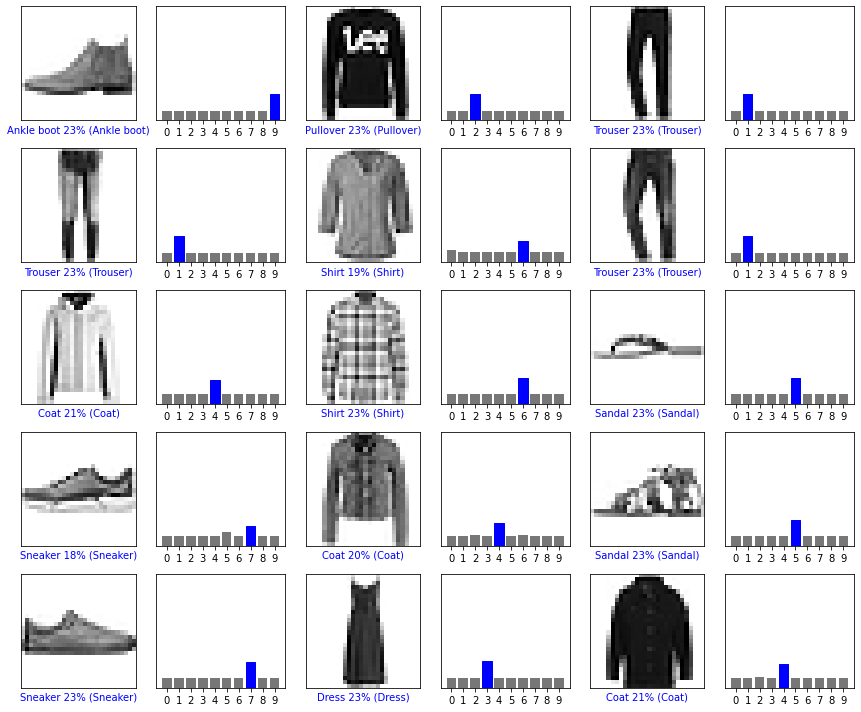

In [15]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()